In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from moviepy.editor import VideoFileClip
import matplotlib.image as mpimg
import os

from functions import*

%matplotlib inline 

## Output of Edge Detection

Total number of images: 8


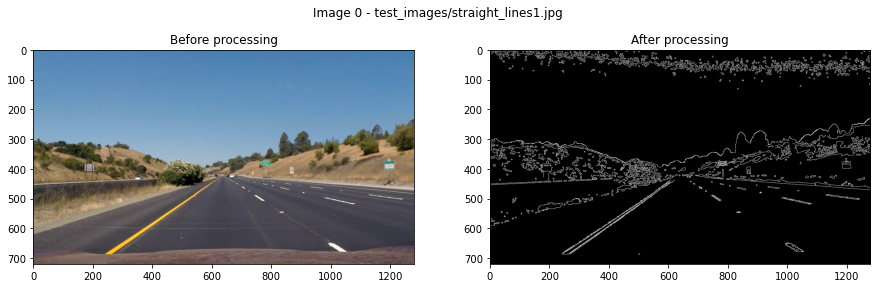

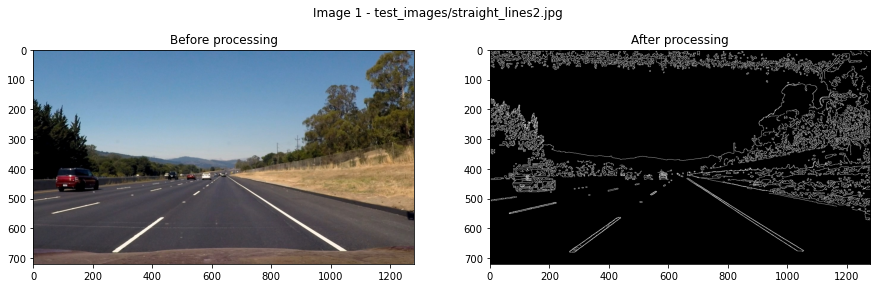

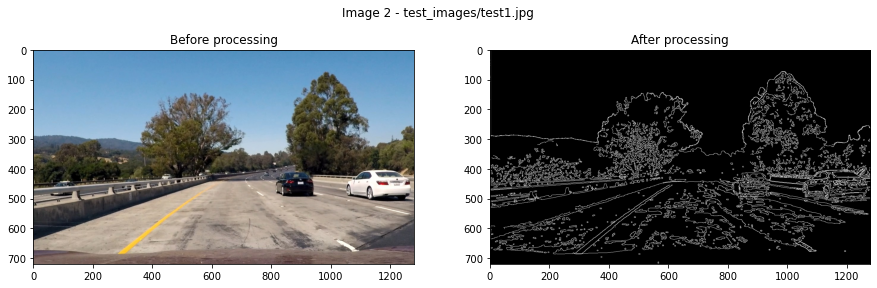

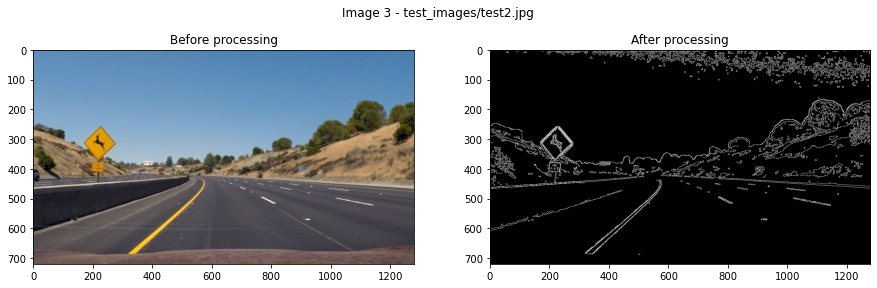

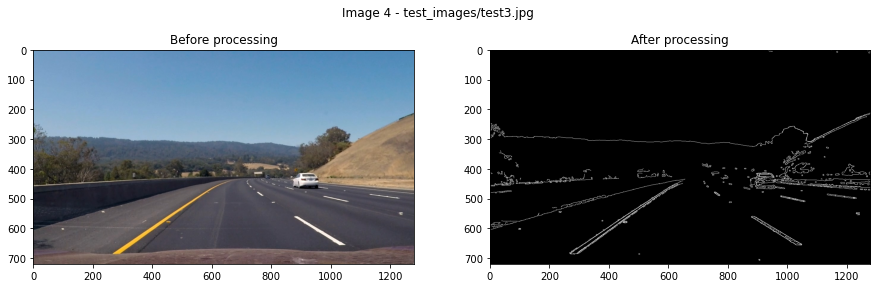

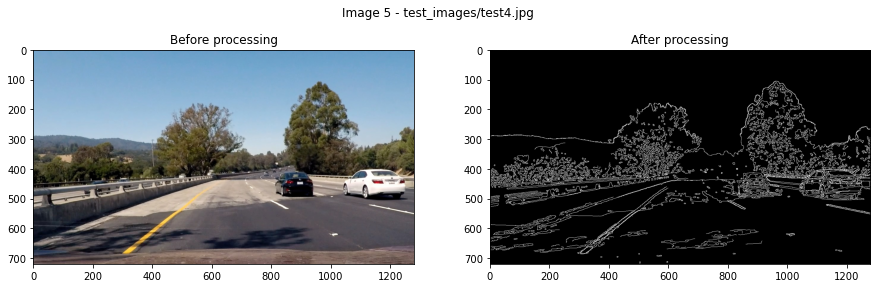

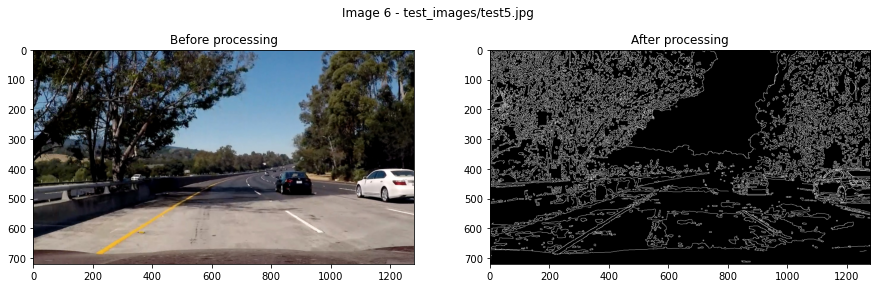

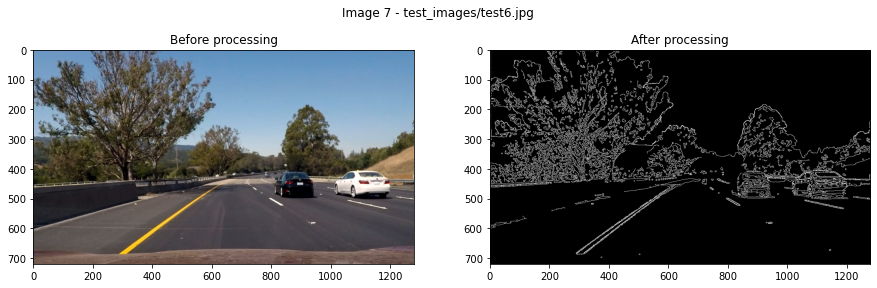

In [2]:

edge_output = []

# Run line detector and display output
img_folder = "test_images/"
img_fnames = [img_folder + img for img in os.listdir(img_folder)]
print("Total number of images: %d" % len(img_fnames))
only_use_images = []

for i, img_fname in enumerate(img_fnames):
    # Can quickly specify indices of images to use
    if only_use_images and (i not in only_use_images):
        continue
    
    # Main body
    img = mpimg.imread(img_fname)
    img_out = Edge_Detection(img)
    
    edge_output.append(img_out)
    
    # Plot output
    plt.rcParams['figure.figsize'] = [15, 5]  # larger plots
    _, _ = plt.subplots()
    plt.subplots_adjust(top=1.)
    plt.suptitle("Image %d - %s" % (i, img_fname))
    
    ax = plt.subplot(1, 2, 1)
    ax.set_title("Before processing")
    plt.imshow(img)
    ax = plt.subplot(1, 2, 2)
    ax.set_title("After processing")
    if len(img_out.shape) > 2:
        plt.imshow(img_out)
    else:
        plt.imshow(img_out, cmap='gray')

## Output of Perspective Transfrom

Total number of images: 8


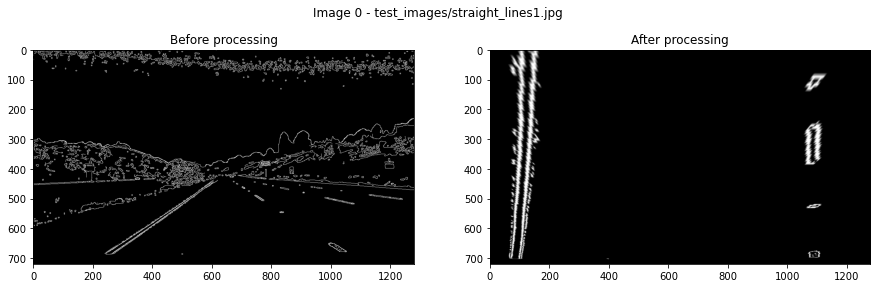

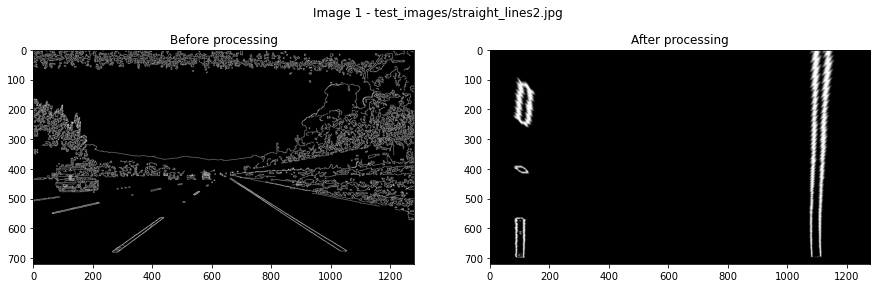

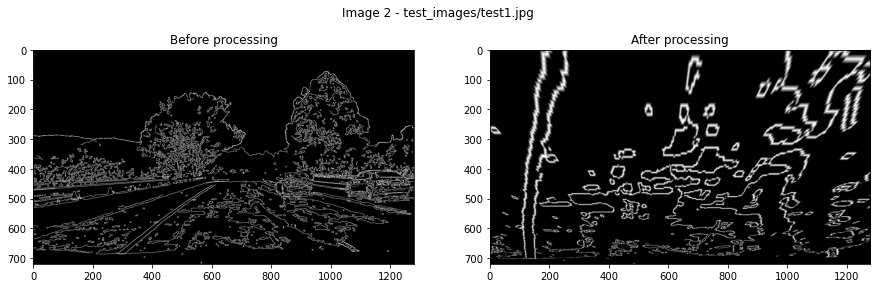

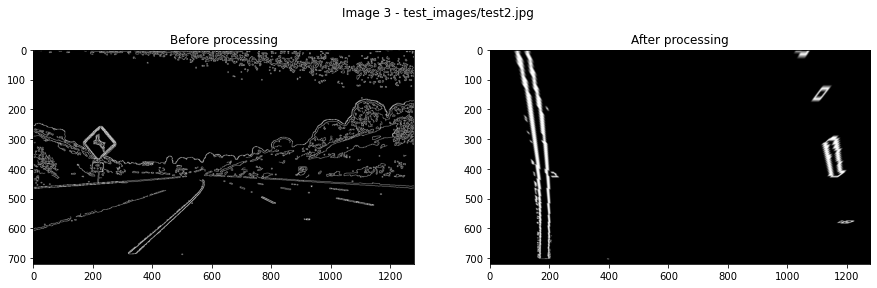

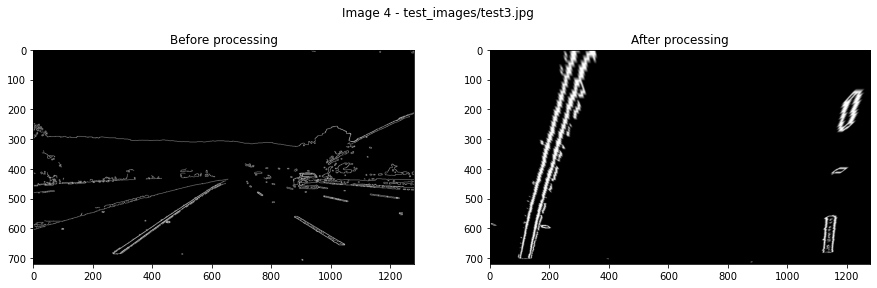

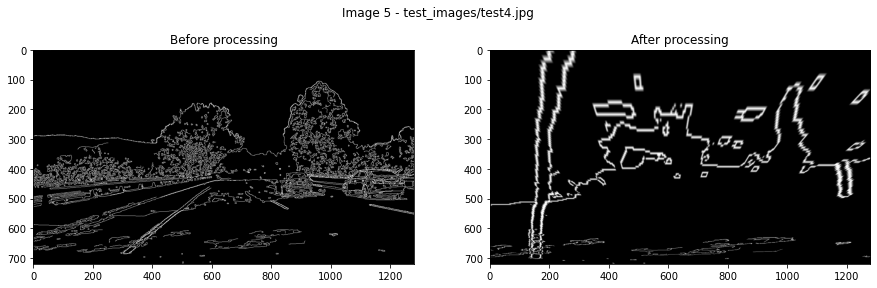

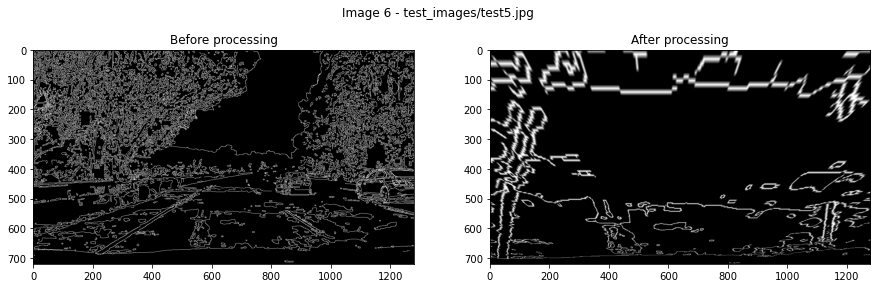

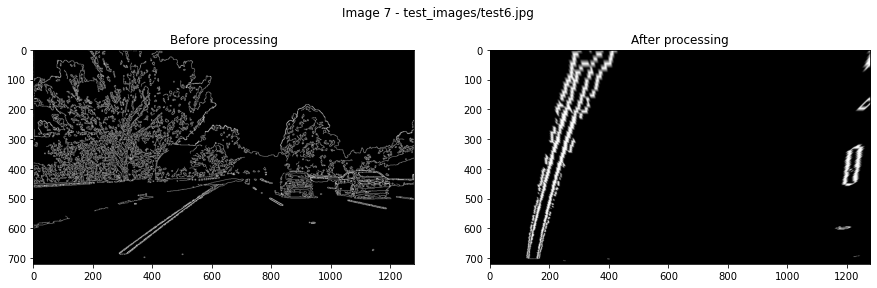

In [3]:
perspective_output = []


# Run line detector and display output
img_folder = "test_images/"
img_fnames = [img_folder + img for img in os.listdir(img_folder)]
print("Total number of images: %d" % len(img_fnames))
only_use_images = []

for i, img_fname in enumerate(img_fnames):
    # Can quickly specify indices of images to use
    if only_use_images and (i not in only_use_images):
        continue
    
    # Main body
    img = edge_output[i]
    img_out = perspective_transform(img)
    perspective_output.append(img_out)

    # Plot output
    plt.rcParams['figure.figsize'] = [15, 5]  # larger plots
    _, _ = plt.subplots()
    plt.subplots_adjust(top=1.)
    plt.suptitle("Image %d - %s" % (i, img_fname))
    
    ax = plt.subplot(1, 2, 1)
    ax.set_title("Before processing")
    plt.imshow(img, cmap = 'gray')
    ax = plt.subplot(1, 2, 2)
    ax.set_title("After processing")
    if len(img_out.shape) > 2:
        plt.imshow(img_out)
    else:
        plt.imshow(img_out, cmap='gray')

## Output of Sliding Window Algorithm

Total number of images: 8


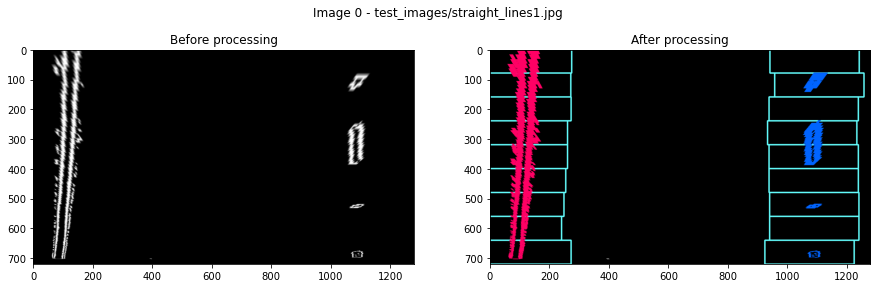

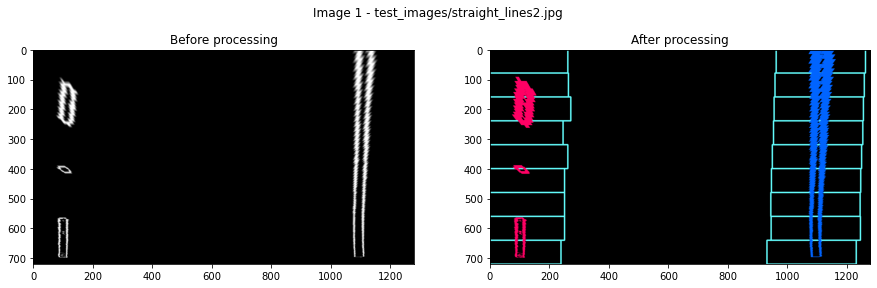

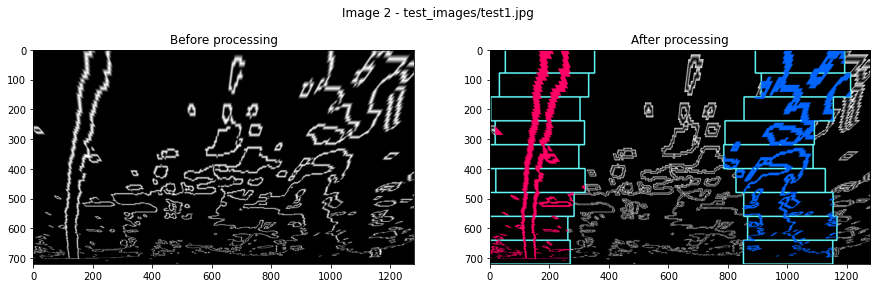

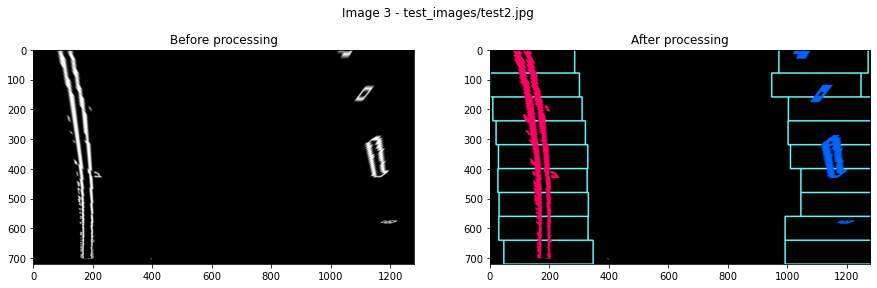

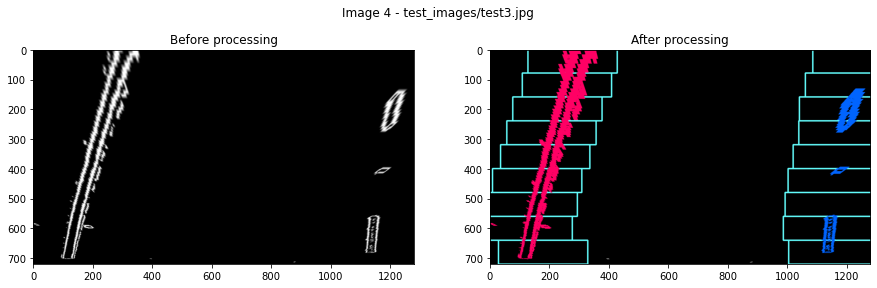

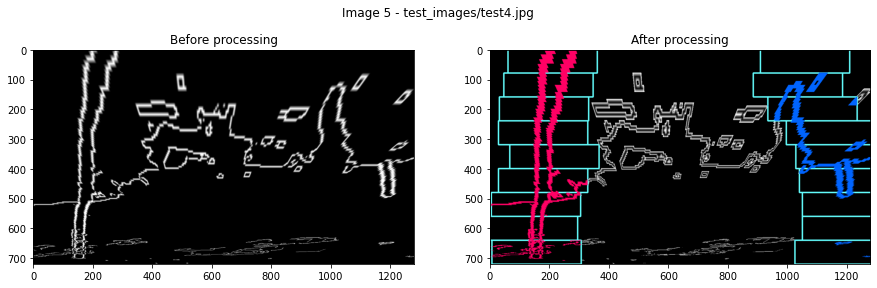

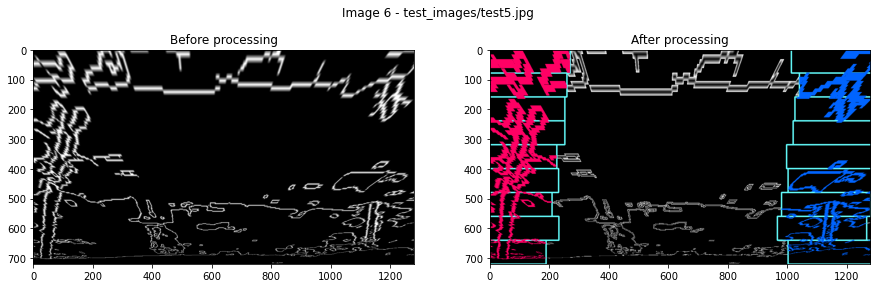

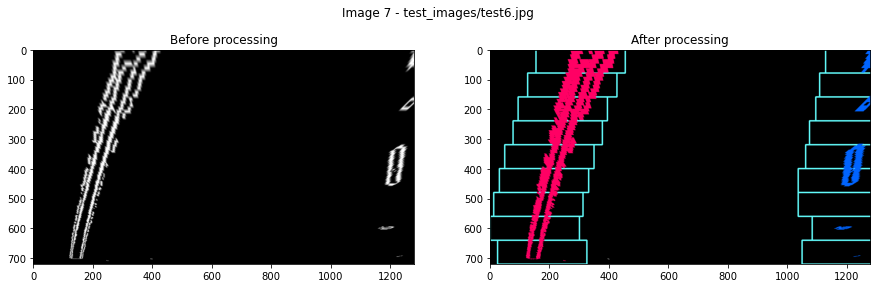

In [4]:
sliding_output = []
sliding_curves = []

# Run line detector and display output
img_folder = "test_images/"
img_fnames = [img_folder + img for img in os.listdir(img_folder)]
print("Total number of images: %d" % len(img_fnames))
only_use_images = []

for i, img_fname in enumerate(img_fnames):
    # Can quickly specify indices of images to use
    if only_use_images and (i not in only_use_images):
        continue
    
    # Main body
    img = perspective_output[i]
    img_out,sliding_curves,_,_ = sliding_window(img)
    sliding_output.append(img_out)
    
    # Plot output
    plt.rcParams['figure.figsize'] = [15, 5]  # larger plots
    _, _ = plt.subplots()
    plt.subplots_adjust(top=1.)
    plt.suptitle("Image %d - %s" % (i, img_fname))
    
    ax = plt.subplot(1, 2, 1)
    ax.set_title("Before processing")
    plt.imshow(img, cmap = 'gray')
    ax = plt.subplot(1, 2, 2)
    ax.set_title("After processing")
    if len(img_out.shape) > 2:
        plt.imshow(img_out)
    else:
        plt.imshow(img_out, cmap='gray')

## Output of Draw Lanes

Total number of images: 8


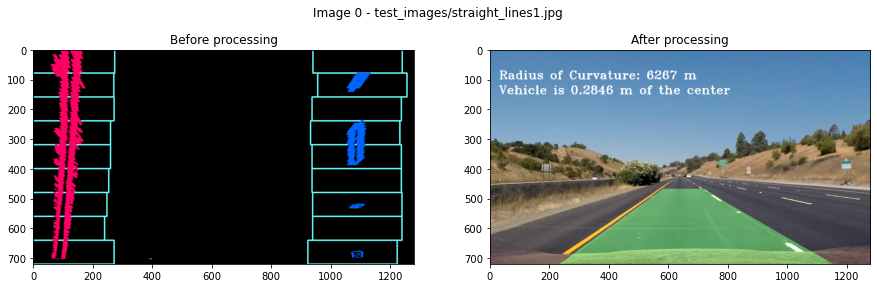

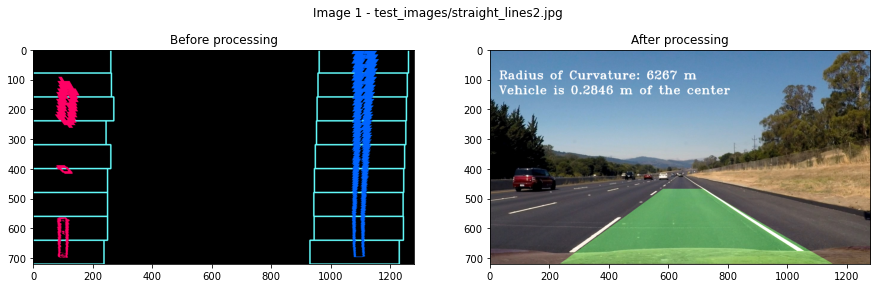

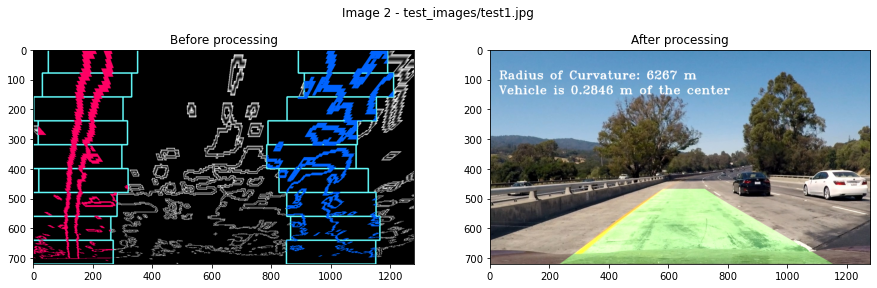

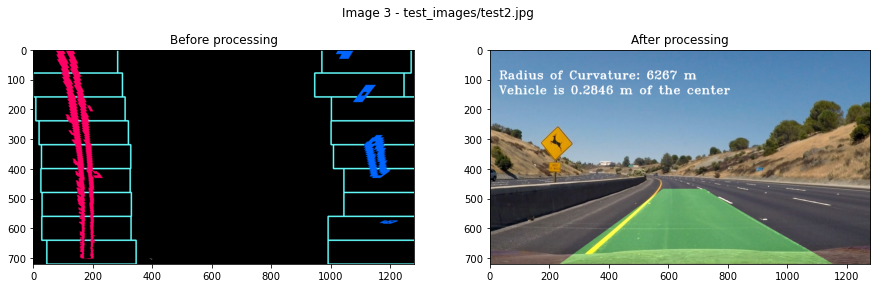

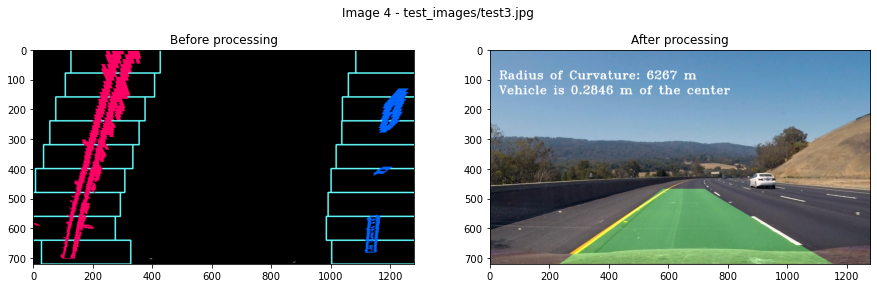

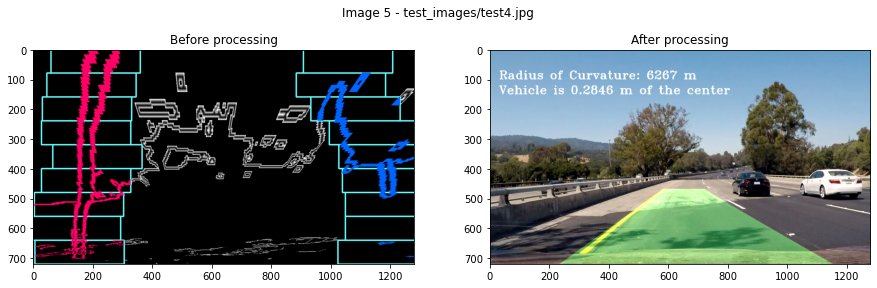

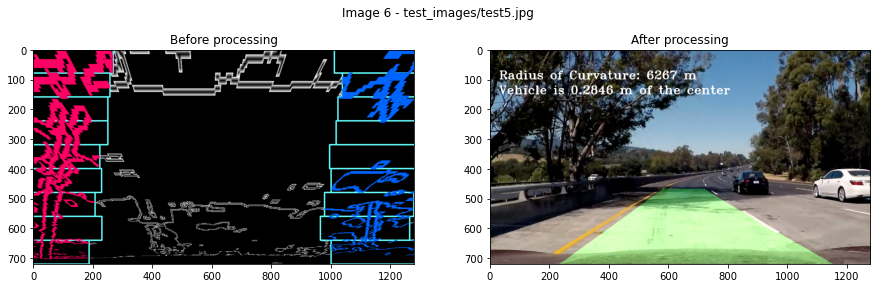

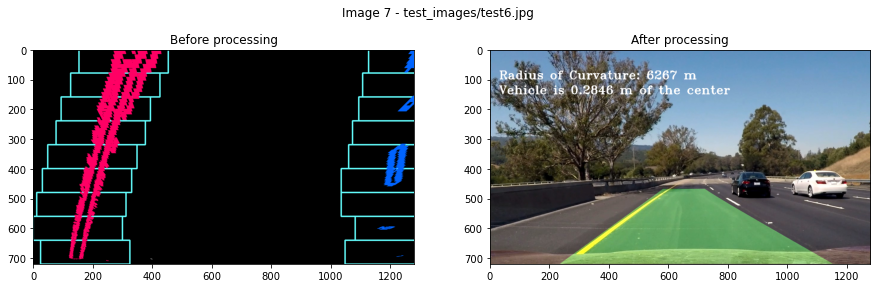

In [5]:
# Run line detector and display output
img_folder = "test_images/"
img_fnames = [img_folder + img for img in os.listdir(img_folder)]
print("Total number of images: %d" % len(img_fnames))
only_use_images = []

for i, img_fname in enumerate(img_fnames):
    # Can quickly specify indices of images to use
    if only_use_images and (i not in only_use_images):
        continue
    
    img2 = mpimg.imread(img_fname)
    
    # Main body
    img = sliding_output[i]
    curve_radius = get_curve(img, sliding_curves[0], sliding_curves[1])  ## Return The radius of right and left curves
    lane_curve = np.mean([curve_radius[0], curve_radius[1]])  ## Calculating the mean value of the right and left curves radius
    img2 = draw_lanes(img2, sliding_curves[0], sliding_curves[1])  ## Draw the Lane
    
    font = cv2.FONT_HERSHEY_TRIPLEX
    fontColor = (255, 255, 255)
    fontSize = 1.3
    cv2.putText(img2, 'Radius of Curvature: {:.0f} m'.format(lane_curve), (30, 100), font, fontSize, fontColor, 2)
    cv2.putText(img2, 'Vehicle is {:.4f} m of the center'.format(curve_radius[2]), (30, 150), font, fontSize, fontColor,2)
    
    
    # Plot output
    plt.rcParams['figure.figsize'] = [15, 5]  # larger plots
    _, _ = plt.subplots()
    plt.subplots_adjust(top=1.)
    plt.suptitle("Image %d - %s" % (i, img_fname))
    
    ax = plt.subplot(1, 2, 1)
    ax.set_title("Before processing")
    plt.imshow(img)
    ax = plt.subplot(1, 2, 2)
    ax.set_title("After processing")
    if len(img_out.shape) > 2:
        plt.imshow(img2)
    else:
        plt.imshow(img2, cmap='gray')